In [515]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [516]:
data = pd.read_csv('dados_tratados.csv', sep='\t', encoding='utf-8')
data_graph = pd.read_csv('dados_mapeados.csv', sep='\t', encoding='utf-8')

In [517]:
data = data.drop('Unnamed: 0', axis=1)

In [518]:
data_graph = data_graph.drop('Unnamed: 0', axis=1)

In [519]:
data_graph.head()

,UF,Situação Censitária,Acesso à Internet,Sexo,Idade,Cor/Raça,Sabe Ler/Escrever,Curso Mais Elevado,Possuí Plano de Saúde,Autoavaliação da Saúde,...,Acompanhamento Regular,Limitação das Atividades Diárias,Última Consulta Médica,Motivo da Consulta Médica,Dificuldade Atendimento Médico,Aconselhamento Médico Rápido por Telefone,Idade Primeiro Diagnóstico de Doença Mental,Faz Psicoterapia,Pratica de Exercício por Semana,Hábitos Alimentares
0,Rondônia,Urbano,Sim,2.0,55.0,Preta,Sim,Educação de jovens e adultos (EJA) ou supletiv...,Não,Regular,...,Sim,Um pouco,Não aplicável,Não aplicável,Não aplicável,Não aplicável,3.0,Não,NaN,2
1,Rondônia,Urbano,Sim,2.0,30.0,Branca,Sim,Não aplicável,Não,Ruim,...,NaN,Um pouco,Mais de 15 dias até 1 mês,Consulta pré-natal,Não aplicável,Não aplicável,1.0,Sim,NaN,2
2,Rondônia,Urbano,Sim,2.0,46.0,Parda,Não,Não aplicável,Não,Regular,...,NaN,Um pouco,Até 15 dias,Não aplicável,Não aplicável,Não aplicável,1.0,Sim,1.0,2
3,Rondônia,Urbano,Sim,2.0,65.0,Branca,Sim,Especialização de nível superior (duração míni...,Sim,Regular,...,Sim,Um pouco,Mais de 15 dias até 1 mês,"Outro exame médico (admissional, para carteira...",Não aplicável,Não aplicável,3.0,Sim,NaN,2
4,Rondônia,Urbano,Sim,1.0,23.0,Branca,Sim,Regular do ensino médio ou do 2º grau,Não,Boa,...,Sim,Um pouco,Até 15 dias,Não aplicável,Não aplicável,Não aplicável,2.0,Não,NaN,1


In [520]:
data.head()

,UF,Situação Censitária,Acesso à Internet,Sexo,Idade,Cor/Raça,Sabe Ler/Escrever,Curso Mais Elevado,Possuí Plano de Saúde,Autoavaliação da Saúde,...,Acompanhamento Regular,Limitação das Atividades Diárias,Última Consulta Médica,Motivo da Consulta Médica,Dificuldade Atendimento Médico,Aconselhamento Médico Rápido por Telefone,Idade Primeiro Diagnóstico de Doença Mental,Faz Psicoterapia,Pratica de Exercício por Semana,Hábitos Alimentares
0,11,1,1.0,2.0,55.0,2.0,1.0,11.0,2.0,3.0,...,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,2
1,11,1,1.0,2.0,30.0,1.0,1.0,NaN,2.0,4.0,...,3.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,2
2,11,1,1.0,2.0,46.0,4.0,2.0,NaN,2.0,3.0,...,4.0,2.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,2
3,11,1,1.0,2.0,65.0,1.0,1.0,13.0,1.0,3.0,...,1.0,2.0,2.0,8.0,NaN,NaN,3.0,1.0,NaN,2
4,11,1,1.0,1.0,23.0,1.0,1.0,10.0,2.0,2.0,...,1.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,1


In [521]:
data.shape

(4905, 34)

In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   UF                                           4905 non-null   int64  
 1   Situação Censitária                          4905 non-null   int64  
 2   Acesso à Internet                            4905 non-null   float64
 3   Sexo                                         4905 non-null   float64
 4   Idade                                        4905 non-null   float64
 5   Cor/Raça                                     4905 non-null   float64
 6   Sabe Ler/Escrever                            4905 non-null   float64
 7   Curso Mais Elevado                           4161 non-null   float64
 8   Possuí Plano de Saúde                        4905 non-null   float64
 9   Autoavaliação da Saúde                       4905 non-null   float64
 10  

In [523]:
data.describe()

,UF,Situação Censitária,Acesso à Internet,Sexo,Idade,Cor/Raça,Sabe Ler/Escrever,Curso Mais Elevado,Possuí Plano de Saúde,Autoavaliação da Saúde,...,Acompanhamento Regular,Limitação das Atividades Diárias,Última Consulta Médica,Motivo da Consulta Médica,Dificuldade Atendimento Médico,Aconselhamento Médico Rápido por Telefone,Idade Primeiro Diagnóstico de Doença Mental,Faz Psicoterapia,Pratica de Exercício por Semana,Hábitos Alimentares
count,4905.000000,4905.00000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4161.000000,4905.000000,4905.000000,...,4905.000000,4905.000000,3868.000000,2304.000000,704.000000,704.000000,4905.000000,4905.000000,2225.000000,4905.000000
mean,32.515189,1.13945,1.141692,1.713558,44.015087,2.464220,1.061978,9.325643,1.655861,2.586748,...,2.004281,1.964118,1.595657,5.438368,3.173295,2.420455,1.845872,1.458104,3.444045,2.040775
std,10.772669,0.34645,0.348770,0.452145,15.754857,1.441913,0.241139,2.654176,0.475135,0.921395,...,1.225320,0.186014,0.490828,3.335440,1.069996,1.250630,0.781291,0.498292,1.886539,0.553766
min,11.000000,1.00000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,25.000000,1.00000,1.000000,1.000000,32.000000,1.000000,1.000000,7.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,32.000000,1.00000,1.000000,2.000000,43.000000,2.000000,1.000000,10.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,8.000000,4.000000,2.000000,2.000000,1.000000,3.000000,2.000000
75%,41.000000,1.00000,1.000000,2.000000,55.000000,4.000000,1.000000,12.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,8.000000,4.000000,4.000000,2.000000,2.000000,5.000000,2.000000
max,53.000000,2.00000,2.000000,2.000000,97.000000,5.000000,2.000000,15.000000,2.000000,5.000000,...,5.000000,2.000000,2.000000,13.000000,5.000000,5.000000,3.000000,2.000000,7.000000,3.000000


In [524]:
dataMissing = data.isnull().sum()
print(dataMissing)

UF                                                0
Situação Censitária                               0
Acesso à Internet                                 0
Sexo                                              0
Idade                                             0
Cor/Raça                                          0
Sabe Ler/Escrever                                 0
Curso Mais Elevado                              744
Possuí Plano de Saúde                             0
Autoavaliação da Saúde                            0
Diagnóstico de Hipertensão                       33
Diagnóstico de Diabetes                         123
Diagnóstico de Colesterol Alto                  162
Diagnóstico de AVC                                0
Diagnóstico de Asma                               0
Diagnóstico de Artrite/Reumatismo                 0
Diagnóstico de DORT                               0
Diagnóstico de Depressão                       2626
Diagnóstico de Outra Doença Mental                0
Diagnóstico 

In [525]:
dataOk = dataMissing[dataMissing <= 2452].index

dataFiltred = data[dataOk]

data = dataFiltred

In [526]:
data.shape

(4905, 29)

In [527]:
data['Diagnóstico de TOC'].value_counts()

Diagnóstico de TOC
1.0    3741
2.0    1164
Name: count, dtype: int64

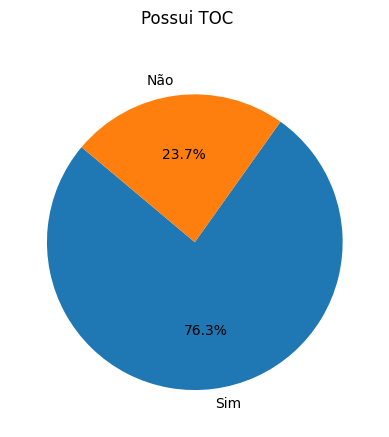

In [528]:
plt.pie(data['Diagnóstico de TOC'].value_counts(), labels=['Sim', 'Não'], autopct='%1.1f%%', startangle=140)
plt.suptitle('Possui TOC')
plt.show()

##### Verificando correlação dos dados

In [529]:
correlation_matrix = data.corr()

In [530]:
correlation_matrix['Diagnóstico de TOC']

UF                                            -0.033886
Situação Censitária                            0.006475
Acesso à Internet                              0.059185
Sexo                                          -0.055735
Idade                                          0.005063
Cor/Raça                                      -0.006100
Sabe Ler/Escrever                              0.045430
Curso Mais Elevado                            -0.028580
Possuí Plano de Saúde                          0.047991
Autoavaliação da Saúde                         0.073874
Diagnóstico de Hipertensão                     0.024010
Diagnóstico de Diabetes                       -0.026095
Diagnóstico de Colesterol Alto                 0.045820
Diagnóstico de AVC                            -0.027359
Diagnóstico de Asma                            0.017095
Diagnóstico de Artrite/Reumatismo              0.022542
Diagnóstico de DORT                            0.014512
Diagnóstico de Outra Doença Mental            -0

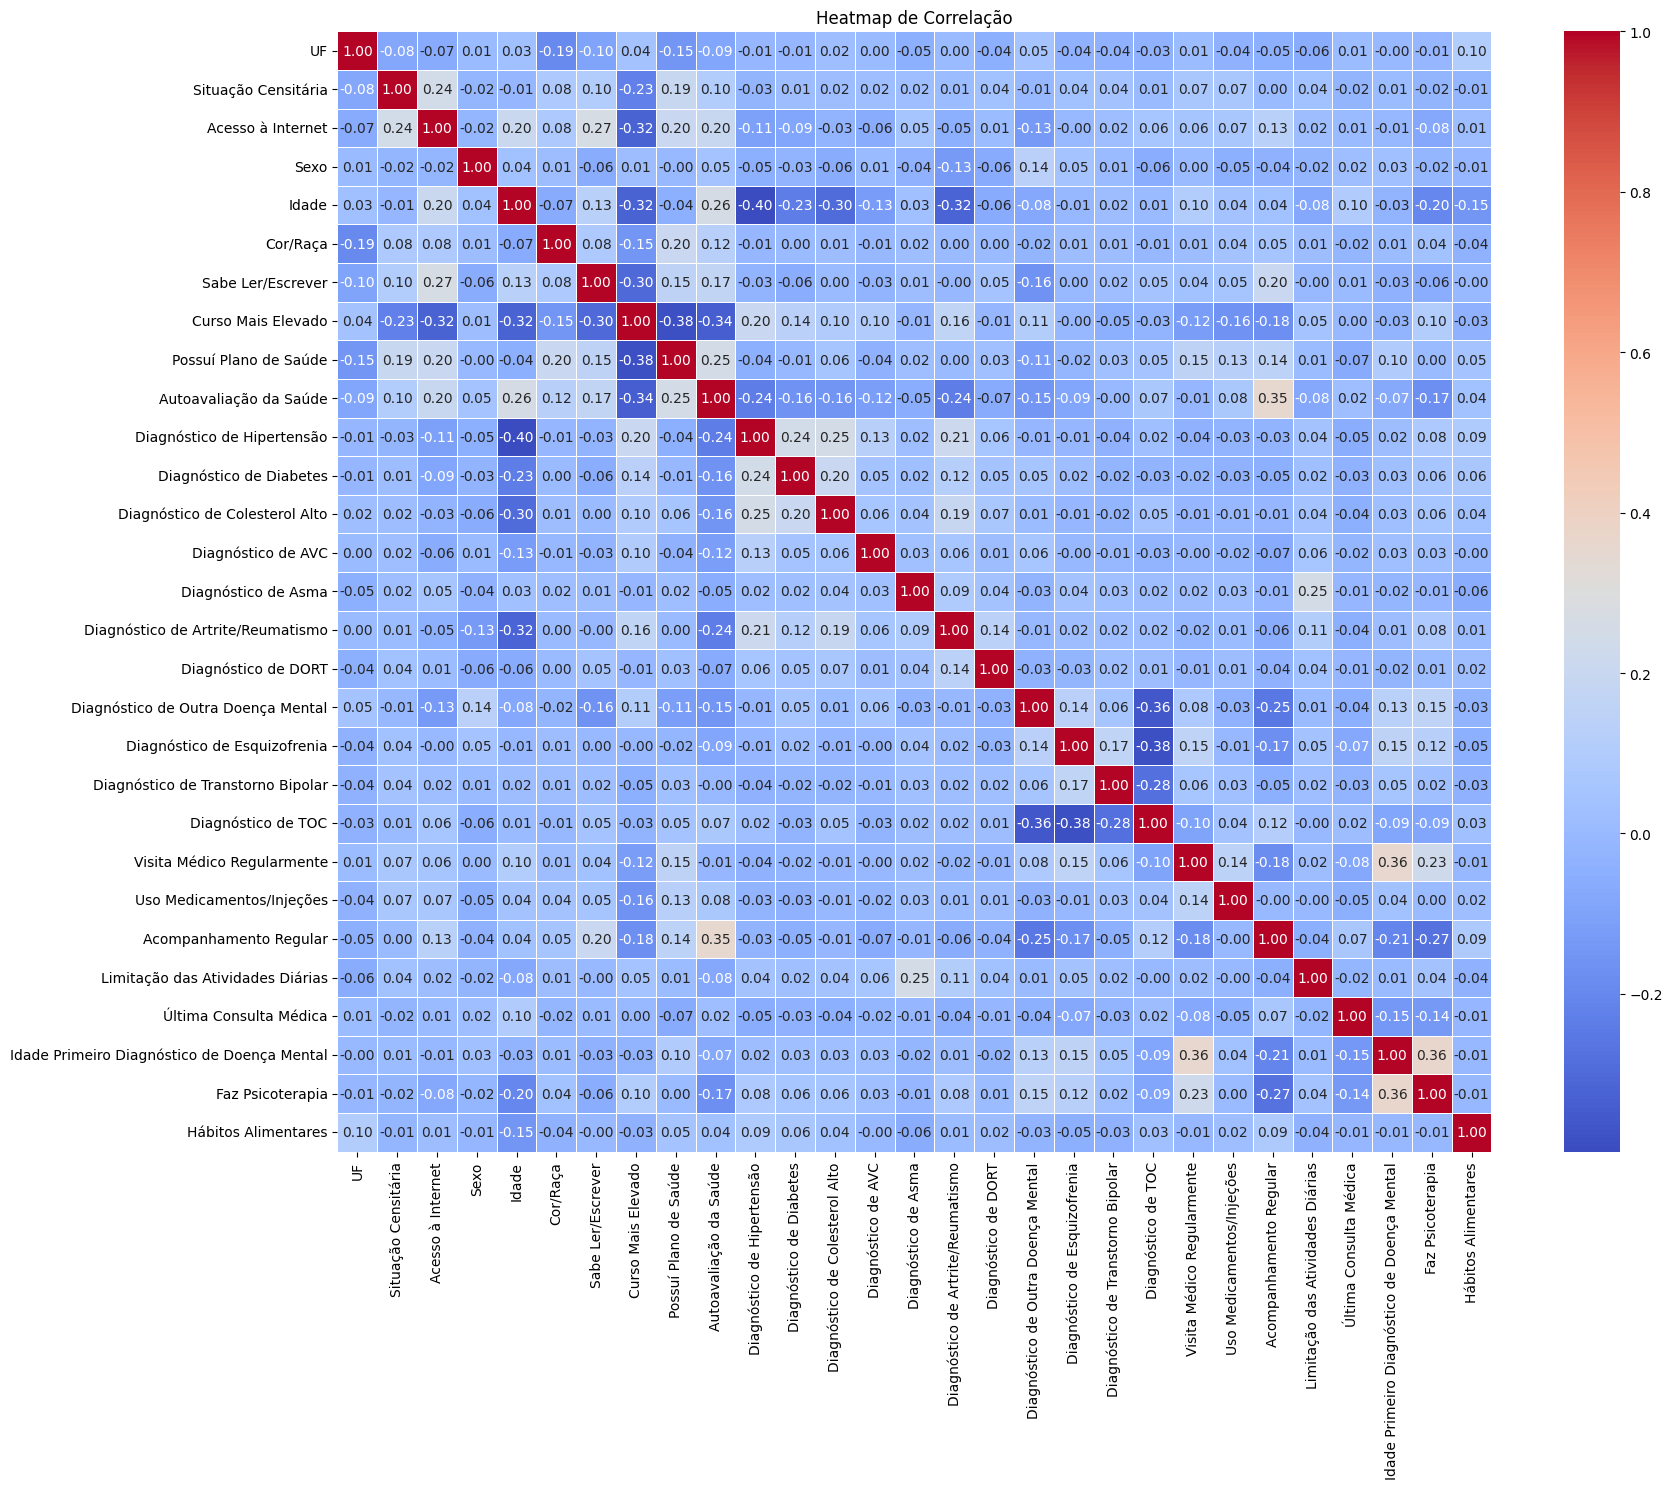

<Figure size 640x480 with 0 Axes>

In [531]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap_large.png') 

In [532]:
correlation = data.corr(numeric_only=True)
print(correlation)

                                                   UF  Situação Censitária  \
UF                                           1.000000            -0.083943   
Situação Censitária                         -0.083943             1.000000   
Acesso à Internet                           -0.068279             0.243154   
Sexo                                         0.006775            -0.019622   
Idade                                        0.030433            -0.012863   
Cor/Raça                                    -0.192164             0.083465   
Sabe Ler/Escrever                           -0.095580             0.103998   
Curso Mais Elevado                           0.044866            -0.225004   
Possuí Plano de Saúde                       -0.147538             0.194971   
Autoavaliação da Saúde                      -0.090161             0.104548   
Diagnóstico de Hipertensão                  -0.011788            -0.025109   
Diagnóstico de Diabetes                     -0.010117           

In [533]:
# pd.crosstab(data_graph['Sexo'], data_graph['Diagnóstico de TOC']).plot(kind='bar')
# plt.xlabel("Sexo")
# plt.ylabel("Frequência (Contagem)")
# plt.title("Diagnóstico de TOC por Sexo")
# plt.show()

### Machine Learning

###### Será utilizado KMeans para obter uma relação dos dados com o Diagnóstico de TOC

In [534]:
import numpy as np
from scipy.spatial.distance import cdist
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [535]:
#kmeans = KMeans(n_clusters=5)

In [536]:
featuresCluster = data.select_dtypes(include=['number']).copy()

Normalização

In [537]:
scaler = StandardScaler()
featuresScalonadas= scaler.fit_transform(featuresCluster)

Método do cotovelo para selecionar o melhor valor de k

In [538]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(data)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

Validação

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix